In [19]:
## Task 1
# Fetching data
# Write a function that 
# a: creates a directory in my workspace
# b: downloads the housing dataset from https://github.com/ageron/handson-ml/tree/master/

import pandas as pd
import os
import requests

file_url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
file_destination = "data"
file_name = "housing.csv"



def get_dataset_from_online(url, destination, file_name):
    """Downloads raw github files to given directory relative to this notebook

    Args:
        url (str): the url of the raw data
        destination (str): file path relative to the notebook
        file_name (str): the name of the file you want to create (name.csv)
    """

    if not os.path.exists(destination):
        print("Creating directory")
        os.mkdir(destination)
    else:
        print("Directory already exists")

    file_path = os.path.join(destination, file_name)
    if not os.path.exists(file_path):
        print("Downloading file")

        req = requests.get(file_url, stream=True)
        if req.ok:
            print("Saving to given destination")
            with open(file_path, "wb") as f:
                for chunk in req.iter_content(chunk_size=1024*16):
                    if chunk:
                        f.write(chunk)
                        f.flush()
                        os.fsync(f.fileno())
        else:
            print(f"Download failed: status code {req.status_code}\n{req.text}")
    else:
        print("File already exists, cancelling")

get_dataset_from_online(file_url, file_destination, file_name)

Directory already exists
File already exists, cancelling


In [20]:
## Task 2
# loading data

import os
import pandas as pd

file_path = "data\housing.csv"

def load_csv_to_dataframe(file_path):
    """Loads a given csv file to dataframe

    Args:
        file_path (str): path to the csv file

    Returns:
        obj: a dataframe containing data from given csv file
    """
    if not os.path.exists(file_path):
        print("File does not exist")
    else:
        dataframe = pd.read_csv(file_path)
        print("Dataframe loaded")
        # print(dataframe.info())
        
        return dataframe

df = load_csv_to_dataframe(file_path)

Dataframe loaded


In [21]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
df.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [23]:
desc = df.describe()

In [24]:
desc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'total_rooms'}>]], dtype=object)

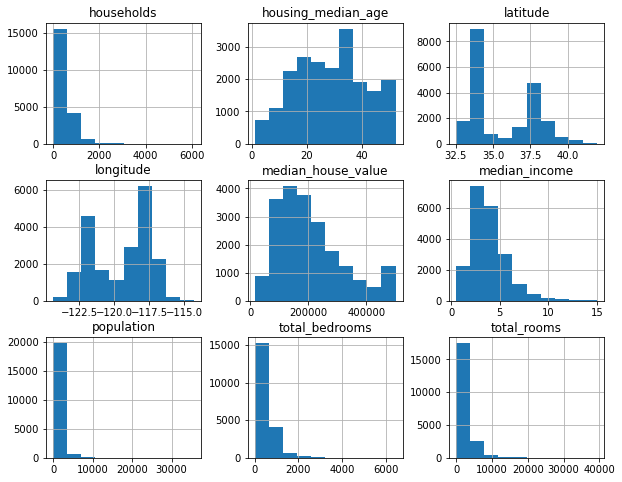

In [25]:
df.hist(figsize=(10,8))

# Task 3. Take a glance at the data

## Data conclusions
It seems like there are some extreme outliers on the following columns (based on what we can see in the histograms)
- total rooms
- total bedrooms
- population
- households
- median income

### Data types
- longitude             number
- latitude              number
- housing_median_age    number
- total_rooms           number
- total_bedrooms        number
- population            number
- households            number
- median_income         number
- median_house_value    number
- ocean_proximity       text

the last column can not be plotted as it only contains text. The text seems to be categorized into five (5) different categories.

## In df.info() we can see
There are some missing values for the total_bedrooms column. It has 20433 values while all other columns have 20640 values. It is missing 207 values.
We have datatypes: float64(9), object(1)

## In the df.describe() data we can see
There are extreme outliers in total_rooms, with a min value of 2, max value of 39320 and a mean of 2635. We can also tell by looking at 75% and max. The max value is more than 10 times higher than the 75% largest. 

Population column shares the same characteristics of the total_rooms columns in that there are outliers. But here the max value is more than 20 times the value of the 75% highest value. 

Almost all columns share an outlier on the low side of the values. The min value is much lower than the 25% lowest value for almost all columns. This could mean that there is a row which has very low numbers. Or there are multiple rows that all have one column with a very low value. 


In [26]:
## Task 4
# split the data

from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(df[["longitude", "latitude"]], # X
                                                    df["median_house_value"],      # y
                                                    test_size=0.2, train_size=0.8) # test and train size 

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 163 to 354
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  16512 non-null  float64
 1   latitude   16512 non-null  float64
dtypes: float64(2)
memory usage: 387.0 KB


Text(0, 0.5, 'Latitude')

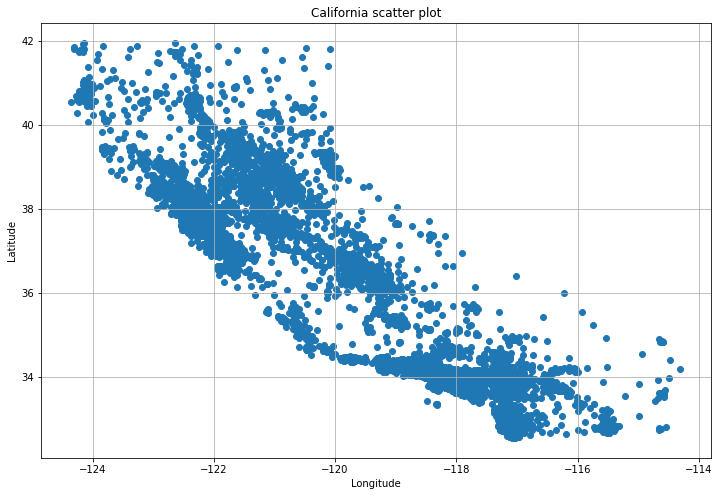

In [27]:
## Task 5
# visualise data

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(df["longitude"], df["latitude"])
plt.grid()
plt.title("California scatter plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

<AxesSubplot:>

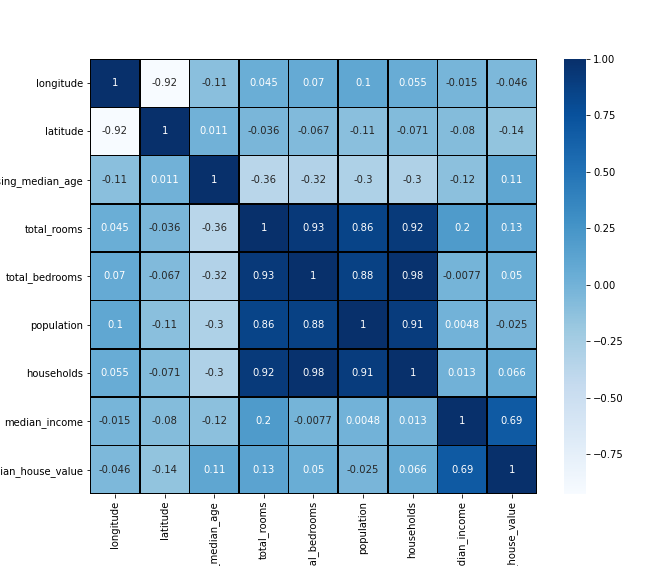

In [28]:
## Task 6
# investigate attribute correlation

import seaborn as sns

correlation = df.corr() # view in variable explorer
# print(correlation)
plt.subplots(figsize=(10,8))
sns.heatmap(correlation, linecolor="black", linewidths=0.5, annot=True, cmap="Blues")

# Correlation Heatmap created from dataframe.corr() method

In [29]:
## Task 7
# Dealing with missing values
df = load_csv_to_dataframe(file_path)

# a: get rid of instances with missing values
df.dropna(axis="index", how="any", inplace=True)
df.info()

Dataframe loaded
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [30]:
# b: get rid of the entire lacking attribute
df = load_csv_to_dataframe(file_path)


Dataframe loaded


In [31]:
# c: fill in the missing values with values mean
df = load_csv_to_dataframe(file_path)

df.fillna(value=int(np.mean(df.loc[df["total_bedrooms"].notnull()]["total_bedrooms"])), inplace=True)

df.info()

Dataframe loaded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
# c: fill in the missing values with values median
df = load_csv_to_dataframe(file_path)

df.fillna(value=np.median(df.loc[df["total_bedrooms"].notnull()]["total_bedrooms"]), inplace=True)

df.info()

Dataframe loaded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [33]:
## Task 8
# dealing with categorical attributes

# Method 1
df = load_csv_to_dataframe(file_path)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["ocean_proximity"])
print(f"Detected [{len(le.classes_)}] classes: {le.classes_}")

df["ocean_proximity"] = le.transform(df["ocean_proximity"])

df.head()

Dataframe loaded
Detected [5] classes: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [34]:
# Method 2
df = load_csv_to_dataframe(file_path) # Load data

from sklearn.preprocessing import OneHotEncoder #Import encoder
from numpy import asarray

data = asarray(df["ocean_proximity"])   # Make dataframe to np.array because series has no reshape method
data = data.reshape(-1, 1)              # Reshape because there is only one feature

ohe = OneHotEncoder(categories="auto", sparse=False)    # Initialize encoder
ohe.fit(data)                                           # Fit on data

transformed = ohe.transform(df["ocean_proximity"].to_numpy().reshape(-1, 1))    # Transform categories to numbers with fitted encoder
print(f"Found [{len(ohe.categories_[0])}] categories: {ohe.categories_[0]}")    # Print info

transformed = pd.DataFrame(transformed, columns=ohe.categories_[0])             # Create new dateframe with transformed features 
df = pd.concat([df, transformed], axis=1).drop(["ocean_proximity"], axis=1)     # Concatanate both dataframes

df.head()

Dataframe loaded
Found [5] categories: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [35]:
# Method 3 from Dayana
df = load_csv_to_dataframe(file_path) # Load data

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(df["ocean_proximity"])
transformed = lb.transform(df["ocean_proximity"])
ohe_df = pd.DataFrame(transformed, columns=lb.classes_)
df = pd.concat([df, ohe_df], axis=1).drop(["ocean_proximity"], axis=1)

df.head()

Dataframe loaded


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [39]:
# Method 4 from Dayana
df = load_csv_to_dataframe(file_path) # Load data

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
location = df.ocean_proximity.apply(lambda x: list(x.split(", ")))
location_df = pd.DataFrame({"ocean_proximity": location})
location_encoded = pd.DataFrame(mlb.fit_transform(location_df["ocean_proximity"]), columns=mlb.classes_)
df_encoded = pd.concat([df, location_encoded], axis=1)

df_encoded.head()

Dataframe loaded


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [47]:
# Method 5 from Leon

df = load_csv_to_dataframe(file_path) # Load data
ocean_proxy = pd.get_dummies(df['ocean_proximity'],drop_first=False)
df = df.drop('ocean_proximity', axis=1)
df = pd.concat([df, ocean_proxy], axis=1)

df.head()

Dataframe loaded


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
